In [114]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import json
import ast
from tqdm import tqdm

In [115]:
counter = 11

In [116]:
def add_week(day):
    return (datetime.strptime(day, '%Y-%m-%d') + timedelta(days=7)).strftime('%Y-%m-%d')

In [117]:
c = 14
emission_data = {}
day = '2018-04-01'
emission_days = [day]
while c > 0:
    with open('/Users/mac/gravity/datasets/dataset_'+str(counter)+'/output_'+str(counter)+'.2/emission_'+day+'T11:00:00.csv',\
              newline='') as emission:
        emission_data[day] = []
        r = csv.reader(emission, delimiter=';')
        for row in emission:
            row = row.strip().split(';')
            #emission_data[row[0]] = [float(i) for i in row[1:]]
            row = [row[0]]+[float(i) for i in row[1:]]
            emission_data[day].append(row)
        day = add_week(day)
        emission_days.append(day)
        c -=1
emission_days = list(emission_data.keys())

## Emission days

In [118]:
emission_days

['2018-04-01',
 '2018-04-08',
 '2018-04-15',
 '2018-04-22',
 '2018-04-29',
 '2018-05-06',
 '2018-05-13',
 '2018-05-20',
 '2018-05-27',
 '2018-06-03',
 '2018-06-10',
 '2018-06-17',
 '2018-06-24',
 '2018-07-01']

In [119]:
global_emission = []
with open('/Users/mac/gravity/datasets/dataset_'+str(counter)+'/output_'+str(counter)+'.2/global_emission.csv', newline='') as file:
    r = csv.reader(file, delimiter=';')
    for row in file:
        row = row.strip().split(';')
        global_emission.append(row)
global_emission = global_emission[1:]

In [120]:
last_peak_activity = [float(i[5]) for i in global_emission]
current_activity = [float(i[4]) for i in global_emission]
delta_current_last = [float(i[4])-float(i[5]) for i in global_emission]

## System activity

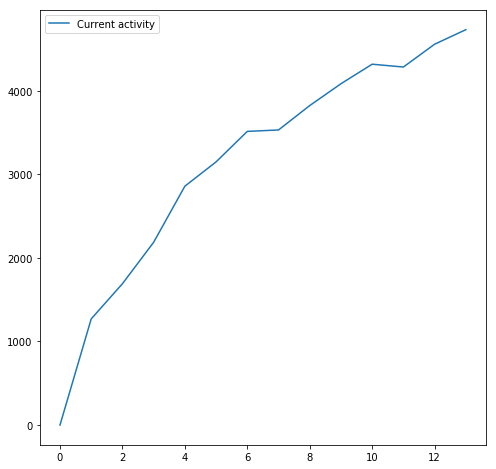

In [121]:
plt.plot(current_activity, label='Current activity')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.legend(loc='upper left')
plt.show()

In [122]:
transactions = []
tx_days = []
with open('/Users/mac/gravity/datasets/dataset_'+str(counter)+'/transaction_history'+str(counter)+'.csv', newline='') as file:
    r = csv.reader(file, delimiter=';')
    for row in file:
        row = row.strip().split(';')
        transactions.append(row)
        if row[0][0:10] not in tx_days:
            tx_days.append(row[0][0:10])

In [123]:
volumes = []
emission_volumes = {}
tx_count = []
for day in emission_days[:-1]:
    emission_volumes[day] = 0
    index = emission_days.index(day)
    count = 0
    for row in transactions:
        if row[0][0:10] >= day and row[0][0:10] < emission_days[index+1]:
            emission_volumes[day] += float(row[3])
            count +=1
    volumes.append(emission_volumes[day])
    tx_count.append(count)

## Weekly dynamics

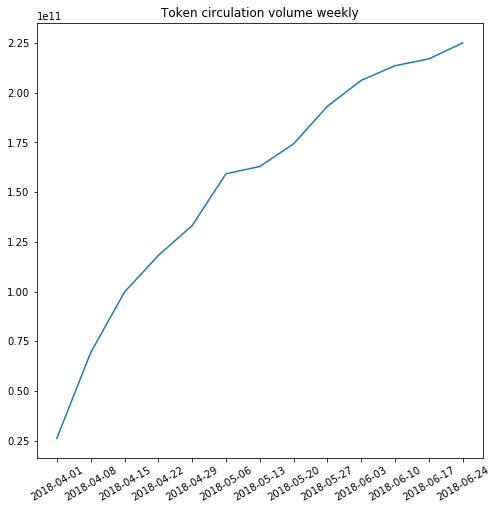

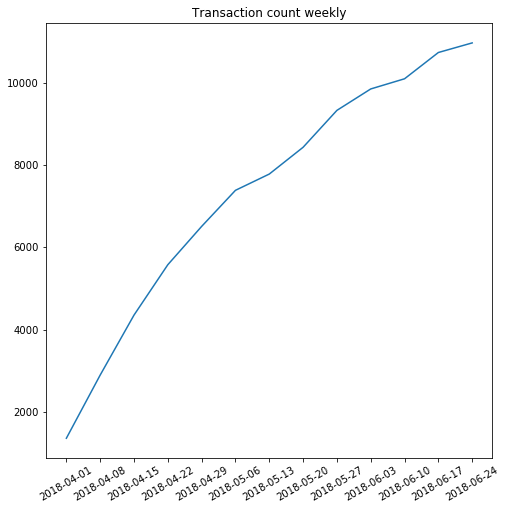

In [124]:
plt.plot(volumes)
plt.title('Token circulation volume weekly')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.xticks(range(len(emission_days[:-1])), emission_days[:-1], rotation=30)
plt.show()
plt.plot(tx_count)
plt.title('Transaction count weekly')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.xticks(range(len(emission_days[:-1])), emission_days[:-1], rotation=30)
plt.show()

In [125]:
def plot_activity(address, account_type):
    balances = [0]
    for tx in transactions:
        if tx[1] == address:
            b = balances[-1] - float(tx[3])
            balances.append(b)
        elif tx[2] == address:
            b = balances[-1] + float(tx[3])
            balances.append(b)
    print(account_type, len(balances)-1, 'transactions')
    plt.plot(balances)
    plt.title('Account activity')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.ylabel('Balance')
    plt.xlabel('Transaction count')
    plt.show()

In [126]:
def daily_activity(address, account_type):
    balances = [0]
    for day in tx_days:
        b = balances[-1]
        for tx in transactions:
            if tx[0][0:10] == day:
                if tx[1] == address:
                    #print(balances[-1], float(tx[3]))
                    b = balances[-1] - float(tx[3]) - 20
                    balances[-1] = b
                elif tx[2] == address:
                    #print(balances[-1], float(tx[3]))
                    b = balances[-1] + float(tx[3])
                    balances[-1] = b
        balances.append(b)
    print('User:',account_type,'Address:',address)
    plt.plot(balances)
    plt.title('Balance daily')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.xticks(range(len(tx_days))[::10], tx_days[::10], rotation=30)
    plt.ylabel('Balance')
    plt.xlabel('Days')
    plt.show()

def weekly_activity(address, account_type):
    balances = [0]
    volumes = {}
    
    for day in emission_days[:-1]:
        b = balances[-1]
        volumes[day] = 0
        index = emission_days.index(day)
        for tx in transactions:
            if tx[0][0:10] >= day and tx[0][0:10] < emission_days[index+1] and\
            tx[1] == address:
                b = balances[-1] - float(tx[3]) - 20
                balances[-1] = b
                #print(balances[-1], b, float(tx[3]))
            if tx[0][0:10] >= day and tx[0][0:10] < emission_days[index+1] and\
            tx[2] == address:
                b = balances[-1] + float(tx[3])
                balances[-1] = b
                #print(balances[-1], b, float(tx[3]))
        balances.append(b)
    print('User:',account_type,'Address:',address)
    plt.plot(balances)
    plt.title('Balance weekly')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.xticks(range(len(emission_days)), emission_days, rotation=30)
    plt.ylabel('Balance')
    plt.xlabel('Emission days')
    plt.show()
    

In [127]:
balances = {}
with open ('/Users/mac/gravity/datasets/dataset_'+str(counter)+'/balances'+str(counter)+'.csv', newline='') as file:
    r = csv.reader(file, delimiter=';')
    for row in file:
        row = row.strip().split(';')
        balances[row[0]] = float(row[1])

## Typical account behavior: exchange, buyer, seller, hodler, businesses


In [128]:
exchange = 'g5704s5763j9165'
buyer = 'g6012l6386n9501'
seller = 'g2754d7343c5666'
hodler = 'g2321f8531v4976'
businesses =['g4399t8003x5246',
             'g9759n2178n3130',
             'g9219w7119r8837',
             'g4751v6190b4348',
             'g3033z7638v7815',
             'g9690n1906o8708',
             'g5910z3322r8294',
             'g5606u6865d4665']
attackers = ['g6179m4151j2811',
             'g7310y9232g2909',
             'g8983n2757c4203',
             'g1948e9519k7858',
             'g7987g4709w9918',
             'g6509k4727s6127',
             'g9650c5595a8464',
             'g8733d1162m1890',
             'g5973s2134h7012',
             'g3122v7070g7621',
             'g7926j8929y2354',
             'g2725m2446e8329',
             'g5617k6819i8271',
             'g2058r1856x1385',
             'g8025j1854u7310',
             'g4439f4431d6571',
             'g7643r3594e2244',
             'g9579h5944t4796',
             'g6995e8760u3757',
             'g5672p9509s2496',
             'g4965t3061z5050',
             'g6632j4394m2516',
             'g9847q7584q9670',
             'g2957i8069q9368',
             'g3666v6966g9208',
             'g7018s6685b1031',
             'g8200n8837u6486',
             'g1471t3860o6885',
             'g8235q3564c9086',
             'g6407f9961l4884',
             'g8722y9078n9854',
             'g4051b1190g8565',
             'g5939e9524e4837',
             'g1162j2099z9486',
             'g4442v4093d8963',
             'g9361l8389j6703',
             'g4605j3889p7229',
             'g9781a9003n2546',
             'g5485c5895g7564',
             'g5440u3570h8840',
             'g6832f5355p3927',
             'g4291p3368y7307',
             'g5405l3384t3154',
             'g1491c7975f7974',
             'g1912y3680m1578',
             'g1503j6540x4435',
             'g9842s2913j4277',
             'g7217s9803s3717',
             'g8398y7503k8150',
             'g9629s8826f7735',
             'g9930k4477b1849',
             'g4639i3088h6133',
             'g5527p6784t8639',
             'g4001o3839q1735',
             'g2336l4193e2056',
             'g9836o2147z1424',
             'g4075o9742d9884',
             'g7771v9186m4058',
             'g7316f3819o1537',
             'g5034e2789e1303',
             'g3888e6920g6727',
             'g5495s8852b4601',
             'g2016c7426c2774',
             'g8612q8383v4201',
             'g4144u5761w5305',
             'g5079r4369o5586',
             'g3136o6242e9555',
             'g3248e6983r8007',
             'g4779p2570u9329',
             'g5477z7487c1277',
             'g6903t2315y5235',
             'g2163m8015y5932',
             'g8326x5465o6194',
             'g6396v9323e3908',
             'g5506t4498b9431',
             'g6327u8846w2812',
             'g9217j9300p4847',
             'g7278r7096j7208',
             'g7057j7895l7706',
             'g5266i2775g3499',
             'g5064q3741d8757',
             'g2508b1694t9859',
             'g5980m2939j9928',
             'g7994h9103j8101',
             'g7180z6823d2053',
             'g8876c2871i8872',
             'g2337i8667d3581',
             'g4345l4401e4130',
             'g5668n6590f2344',
             'g6591c4862n3883',
             'g5624s4081g3139',
             'g1093a5954y4028',
             'g2544y9046h7415',
             'g5657x6716j1776',
             'g3256k6243a9606',
             'g9605o5373m3088',
             'g9344j3879a9634',
             'g1373z1243q8118',
             'g4245e7559w2637',
             'g5216z8186z2996',
             'g2257f9643z5468',
             'g8327c5968n8199',
             'g1344b5253a8643',
             'g4319m4003r8773',
             'g5954z8076s6391',
             'g3960e8900x4892',
             'g4531l9683p7826',
             'g1130y6548y8149',
             'g4967p9595w8609',
             'g6330i3185g2125',
             'g6404p1262k2378',
             'g8833n5559e8895',
             'g8367p8582s5230',
             'g6453u5842e8963',
             'g3789g5832z5885',
             'g1418g4420u8200',
             'g2643r2681j4147',
             'g9392y7953e9590',
             'g5332m5138s2552',
             'g8068u7379w3570',
             'g5893r4660a8552',
             'g2631c8983e5776',
             'g1562q9099e8643',
             'g9252w1942c7713',
             'g7058u6988v2881',
             'g2903m1470p9870',
             'g8236e2706f9710',
             'g4218i8878o7164',
             'g2517i4782i5079',
             'g1791r8555f2022',
             'g1561r6013z4687',
             'g1496m8257f6338',
             'g3354d2738x2820',
             'g1006i2993t8547',
             'g6841y1000b9781',
             'g5160z2098c2221',
             'g9157d2105l8947',
             'g4911l3601g6976',
             'g8212z5955c9854',
             'g9995j2869z7962',
             'g9341j1682n3719',
             'g9137a6230g9826',
             'g8506f2834g6187',
             'g9851u3863j3262',
             'g6684e6874r7907',
             'g8694w5032m3462',
             'g5959c5192l1310',
             'g8689d8108k3941',
             'g9458f4248b7204',
             'g4411v1089o2837']

In [129]:
for _ in emission_data['2018-07-01']:
    if _[0] == buyer:
        print(buyer, 'Buyer')
        print('Activity index:', _[3], 'Gravity index:', _[4])
        print('Number of tx:', _[7]/20, 'Emission per tx:', _[6]/(_[7]/20))
        print('Emission:', _[6], 'Fees:', _[7], 'Total emission to fees:', _[6]/_[7], '\n')
    if _[0] == seller:
        print(seller, 'Seller')
        print('Activity index:', _[3], 'Gravity index:', _[4])
        print('Number of tx:', _[7]/20, 'Emission per tx:', _[6]/(_[7]/20))
        print('Emission:', _[6], 'Fees:', _[7], 'Total emission to fees:', _[6]/_[7], '\n')
    if _[0] == hodler:
        print(hodler, 'Hodler')
        print('Activity index:', _[3], 'Gravity index:', _[4])
        print('Number of tx:', _[7]/20, 'Emission per tx:', _[6]/(_[7]/20))
        print('Emission:', _[6], 'Fees:', _[7], 'Total emission to fees:', _[6]/_[7], '\n')
    if _[0] == businesses[0]:
        print(businesses[0], 'Business')
        print('Activity index:', _[3], 'Gravity index:', _[4])
        print('Number of tx:', _[7]/20, 'Emission per tx:', _[6]/(_[7]/20))
        print('Emission:', _[6], 'Fees:', _[7], 'Total emission to fees:', _[6]/_[7], '\n')
    if _[0] == businesses[1]:
        print(businesses[1], 'Business')
        print('Activity index:', _[3], 'Gravity index:', _[4])
        print('Number of tx:', _[7]/20, 'Emission per tx:', _[6]/(_[7]/20))
        print('Emission:', _[6], 'Fees:', _[7], 'Total emission to fees:', _[6]/_[7], '\n')
    if _[0] == attackers[1]:
        print(attackers[1], 'Attacker')
        print('Activity index:', _[3], 'Gravity index:', _[4])
        print('Number of tx:', _[7]/20, 'Emission per tx:', _[6]/(_[7]/20))
        print('Emission:', _[6], 'Fees:', _[7], 'Total emission to fees:', _[6]/_[7], '\n')
    if _[0] == attackers[1]:
        print(attackers[1], 'Attacker')
        print('Activity index:', _[3], 'Gravity index:', _[4])
        print('Number of tx:', _[7]/20, 'Emission per tx:', _[6]/(_[7]/20))
        print('Emission:', _[6], 'Fees:', _[7], 'Total emission to fees:', _[6]/_[7], '\n')

g2321f8531v4976 Hodler
Activity index: 0.000338572 Gravity index: 0.000223509
Number of tx: 1.0 Emission per tx: 125.748
Emission: 125.748 Fees: 20.0 Total emission to fees: 6.2874 

g2754d7343c5666 Seller
Activity index: 0.000521729 Gravity index: 0.000157414
Number of tx: 53.0 Emission per tx: 8.940716981132075
Emission: 473.858 Fees: 1060.0 Total emission to fees: 0.44703584905660376 

g4399t8003x5246 Business
Activity index: 0.00208625 Gravity index: 0.00057724
Number of tx: 628.0 Emission per tx: 5.4581687898089175
Emission: 3427.73 Fees: 12560.0 Total emission to fees: 0.27290843949044585 

g6012l6386n9501 Buyer
Activity index: 0.00253986 Gravity index: 0.00101257
Number of tx: 80.0 Emission per tx: 44.240625
Emission: 3539.25 Fees: 1600.0 Total emission to fees: 2.21203125 

g7310y9232g2909 Attacker
Activity index: 0.000374979 Gravity index: 7.50922e-05
Number of tx: 94.0 Emission per tx: 16.302553191489363
Emission: 1532.44 Fees: 1880.0 Total emission to fees: 0.815127659574468

User: exchange Address: g5704s5763j9165


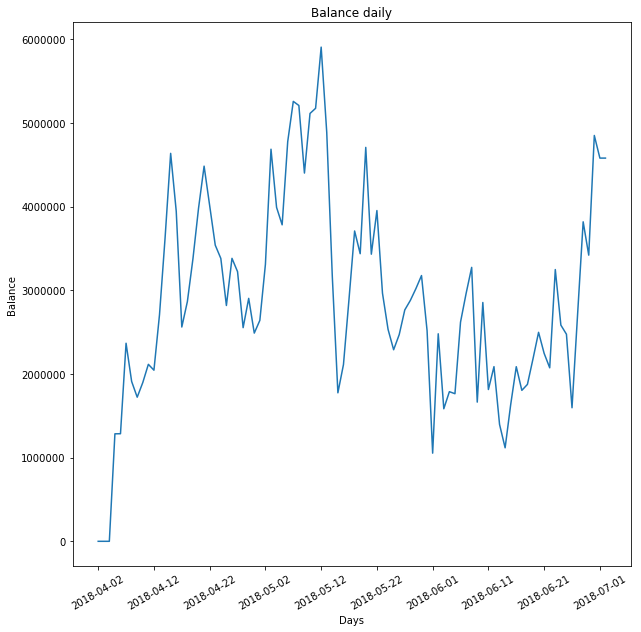

In [130]:
daily_activity(exchange, 'exchange')

User: buyer Address: g6012l6386n9501


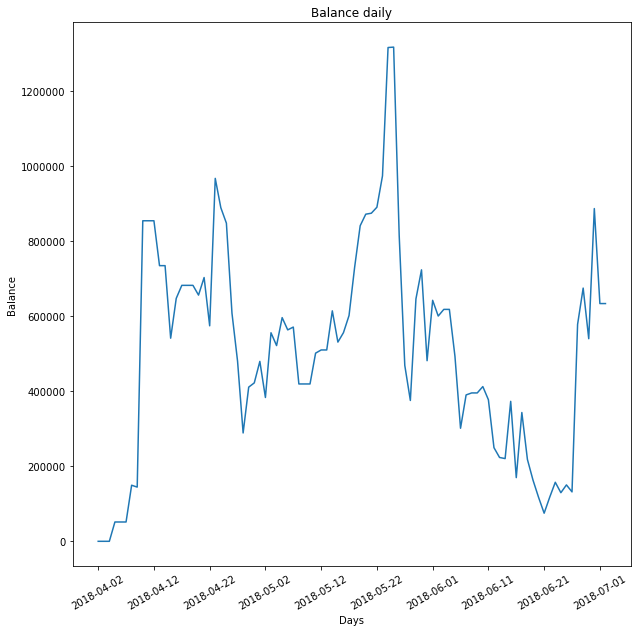

In [131]:
daily_activity(buyer, 'buyer')

User: hodler Address: g2321f8531v4976


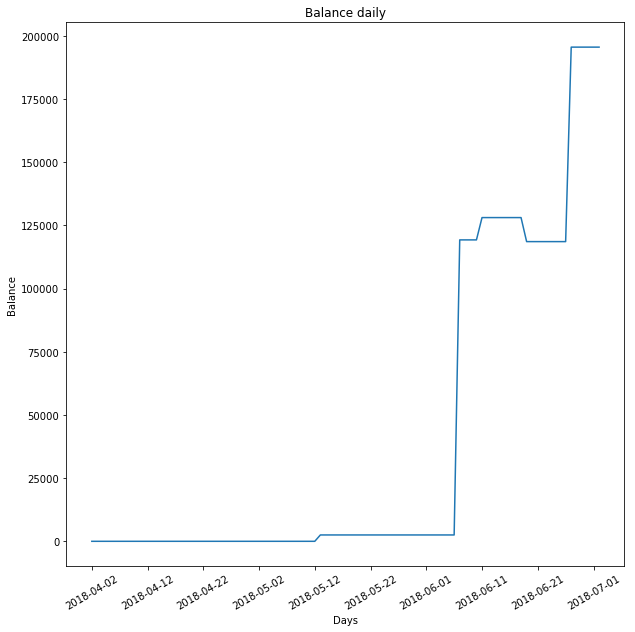

In [132]:
daily_activity(hodler, 'hodler')

User: seller Address: g2754d7343c5666


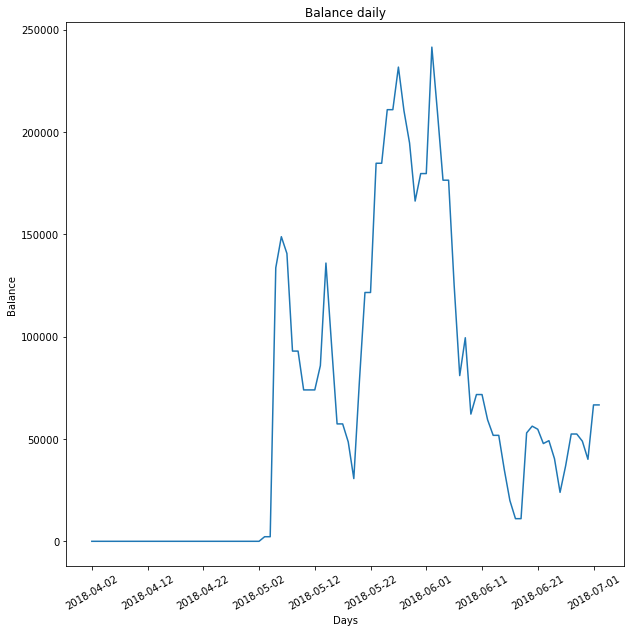

In [133]:
daily_activity(seller, 'seller')

User: business Address: g9759n2178n3130


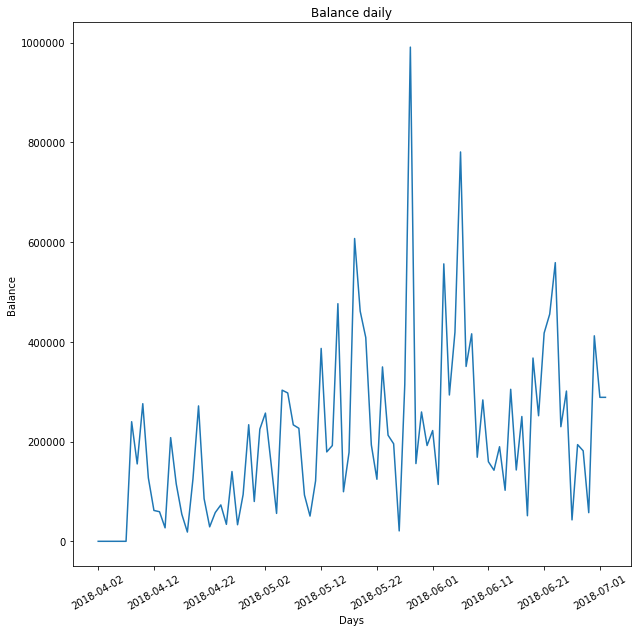

In [134]:
daily_activity(businesses[1], 'business')

User: attacker Address: g6179m4151j2811


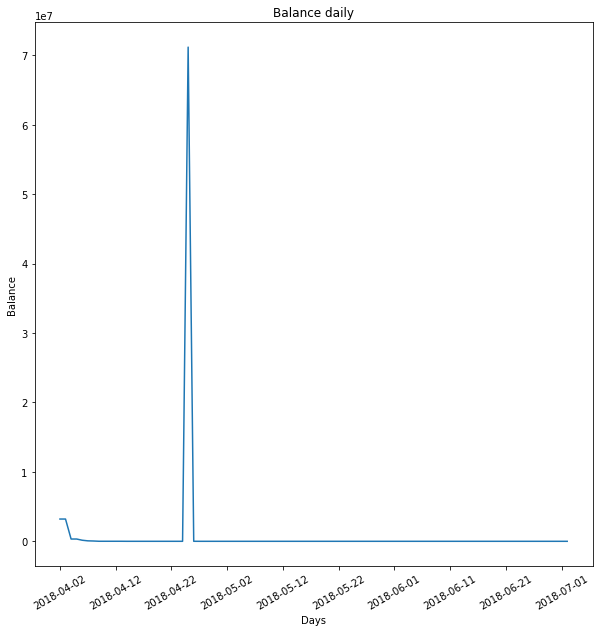

In [135]:
daily_activity(attackers[0], 'attacker')

User: attacker Address: g7310y9232g2909


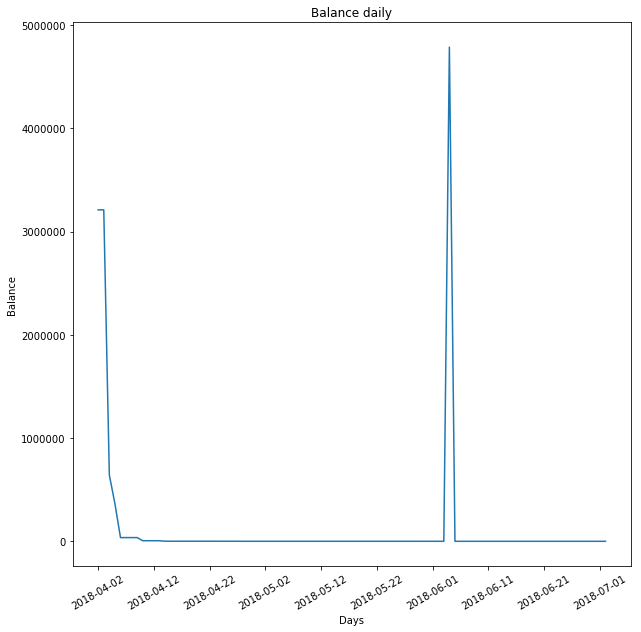

In [136]:
daily_activity(attackers[1], 'attacker')

In [137]:
accounts = []
with open('/Users/mac/gravity/datasets/dataset_'+str(counter)+'/account_history.txt') as file:
    lines = file.readlines()
    for line in lines:
        j = json.loads(json.dumps(line)).strip()
        accounts.append(ast.literal_eval(j))

In [138]:
accounts[0]

{'account_type': 'genesis',
 'address': 'g2834v5381r7956',
 'balance': 785.10211705355,
 'receive': 0,
 'send': 350}

In [139]:
user_types = {}
for _ in accounts:
    if _['address'] not in businesses and _['address'] not in attackers:
        user_types[_['address']] = _['account_type']
    elif _['address'] in businesses:
        user_types[_['address']] = 'business'
    elif _['address'] in attackers:
        user_types[_['address']] = 'attacker'
    else:
        pass

In [140]:
for tx in tqdm(transactions):
    for user in accounts:
        if tx[1] == user['address'] and tx[1] not in businesses and\
        tx[1] not in attackers:
            tx.append(user['account_type'])
        elif tx[1] == user['address'] and tx[1] in businesses:
            tx.append('business')
        elif tx[1] == user['address'] and tx[1] in attackers:
            tx.append('attacker')
        else:
            pass
    for user in accounts:
        if tx[2] == user['address'] and tx[2] not in businesses and\
        tx[2] not in attackers:
            tx.append(user['account_type'])
        elif tx[2] == user['address'] and tx[2] in businesses:
            tx.append('business')
        elif tx[2] == user['address'] and tx[2] in attackers:
            tx.append('attacker')
        else:
            pass

100%|██████████| 96113/96113 [02:48<00:00, 570.86it/s]


In [141]:
index_data = {}
for day in emission_days:
    index_data[day] = []
    with open('/Users/mac/gravity/datasets/dataset_'+str(counter)+'/output_'+str(counter)+'.2/emission_' + day + 'T11:00:00.csv',\
              newline='') as file:
        r = csv.reader(file, delimiter=';')
        for row in file:
            row = row.strip().split(';')
            index_data[day].append(row)

In [142]:
attacker_gravity_index = []
seller_gravity_index = []
buyer_gravity_index = []
hodler_gravity_index= []
exchange_gravity_index = []
genesis_gravity_index = []
business_gravity_index = []
attacker_activity_index = []
seller_activity_index = []
buyer_activity_index = []
hodler_activity_index = []
business_activity_index = []
genesis_activity_index = []
exchange_activity_index = []
attacker_emission = []
seller_emission = []
buyer_emission = []
hodler_emission = []
exchange_emission = []
genesis_emission = []
business_emission = []

for day in emission_days:
    '''
    seller_g = seller_gravity_index[-1]
    buyer_g = buyer_gravity_index[-1]
    hodler_g = hodler_gravity_index[-1]
    exchange_g = exchange_gravity_index[-1]
    genesis_g = genesis_gravity_index[-1]
    business_g = business_gravity_index[-1]
    
    seller_a = seller_activity_index[-1]
    buyer_a = buyer_activity_index[-1]
    hodler_a = hodler_activity_index[-1]
    exchange_a = exchange_activity_index[-1]
    genesis_a = genesis_activity_index[-1]
    business_a = business_activity_index[-1]
    '''
    attacker_g = 0
    seller_g = 0
    buyer_g = 0
    hodler_g = 0
    exchange_g = 0
    genesis_g = 0
    business_g = 0
    
    attacker_a = 0
    seller_a = 0
    buyer_a = 0
    hodler_a = 0
    exchange_a = 0
    genesis_a = 0
    business_a = 0
    
    attacker_e = 0
    seller_e = 0
    buyer_e = 0
    hodler_e = 0
    exchange_e = 0
    genesis_e = 0
    business_e = 0
    
    for state in index_data[day]:
        if user_types[state[0]] == 'seller':
            seller_g += float(state[4])
        if user_types[state[0]] == 'buyer':
            buyer_g += float(state[4])
        if user_types[state[0]] == 'hodler':
            hodler_g += float(state[4])
        if user_types[state[0]] == 'exchange':
            exchange_g += float(state[4])
        if user_types[state[0]] == 'genesis':
            genesis_g += float(state[4])
        if user_types[state[0]] == 'business':
            business_g += float(state[4])
        if user_types[state[0]] == 'attacker':
            attacker_g += float(state[4])
            
    for state in index_data[day]:
        if user_types[state[0]] == 'seller':
            seller_a += float(state[3])
        if user_types[state[0]] == 'buyer':
            buyer_a += float(state[3])
        if user_types[state[0]] == 'hodler':
            hodler_a += float(state[3])
        if user_types[state[0]] == 'exchange':
            exchange_a += float(state[3])
        if user_types[state[0]] == 'genesis':
            genesis_a += float(state[3])
        if user_types[state[0]] == 'business':
            business_a += float(state[3])
        if user_types[state[0]] == 'attacker':
            attacker_a += float(state[3])
            
    for state in index_data[day]:
        if user_types[state[0]] == 'seller':
            seller_e += float(state[5])
        if user_types[state[0]] == 'buyer':
            buyer_e += float(state[5])
        if user_types[state[0]] == 'hodler':
            hodler_e += float(state[5])
        if user_types[state[0]] == 'exchange':
            exchange_e += float(state[5])
        if user_types[state[0]] == 'genesis':
            genesis_e += float(state[5])
        if user_types[state[0]] == 'business':
            business_e += float(state[5])
        if user_types[state[0]] == 'attacker':
            attacker_e += float(state[5])
            
    seller_gravity_index.append(seller_g)
    buyer_gravity_index.append(buyer_g)
    hodler_gravity_index.append(hodler_g)
    exchange_gravity_index.append(exchange_g)
    genesis_gravity_index.append(genesis_g)
    business_gravity_index.append(business_g)
    attacker_gravity_index.append(attacker_g)
    seller_activity_index.append(seller_a)
    buyer_activity_index.append(buyer_a)
    hodler_activity_index.append(hodler_a)
    business_activity_index.append(business_a)
    genesis_activity_index.append(genesis_a)
    exchange_activity_index.append(exchange_a)
    attacker_activity_index.append(attacker_a)
    seller_emission.append(seller_e)
    buyer_emission.append(buyer_e)
    hodler_emission.append(hodler_e)
    exchange_emission.append(exchange_e)
    genesis_emission.append(genesis_e)
    business_emission.append(business_e)
    attacker_emission.append(attacker_e)

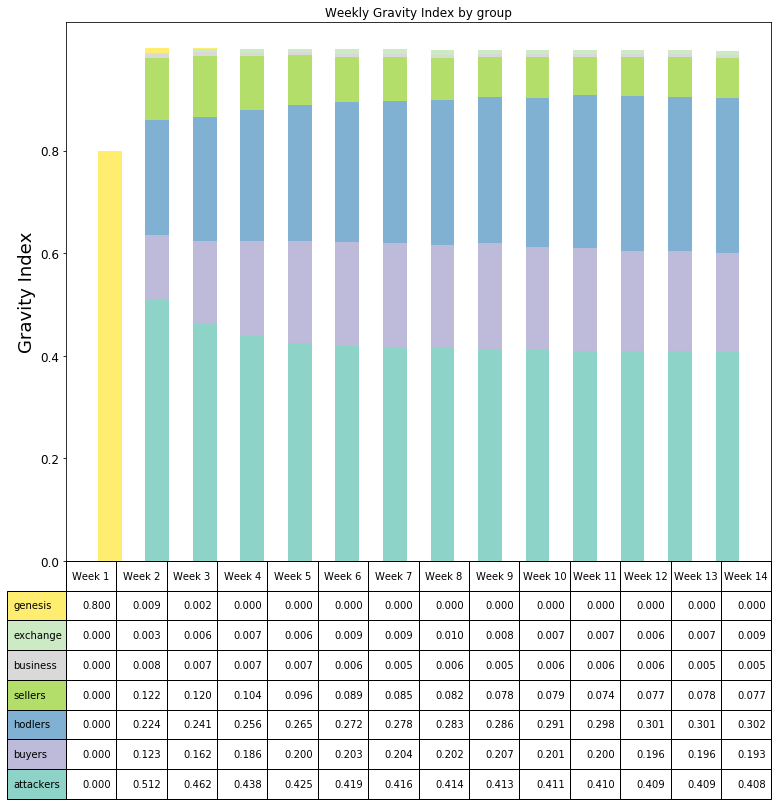

In [143]:
data_gravity_index = [genesis_gravity_index,
                      exchange_gravity_index,
                      business_gravity_index,
                      seller_gravity_index,
                      hodler_gravity_index,
                      buyer_gravity_index,
                      attacker_gravity_index]

columns = ('Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7',\
           'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 'Week 13', 'Week 14')

rows = ['genesis', 'exchange', 'business', 'sellers', 'hodlers', 'buyers', 'attackers']
#rows = rows[::-1]

values = np.arange(0, 1, 0.2)
step = 1
colors = plt.cm.Set3(np.linspace(0, 1, len(rows)))
n_rows = len(data_gravity_index)

index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))

cell_text = []
for row in range(n_rows):
    plt.bar(index, data_gravity_index[::-1][row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_gravity_index[::-1][row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])

colors = colors[::-1]
cell_text.reverse()

y_offset = np.zeros(len(columns))
t_text= []

for row in range(n_rows):
    y_offset = data_gravity_index[row]
    t_text.append(['%1.3f' % (x) for x in y_offset])

gravity_table = plt.table(cellText=t_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

gravity_table.auto_set_font_size(False)
gravity_table.set_fontsize(10)


plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel("Gravity Index",size=18,weight='light')
plt.yticks(values*step, ['%1.1f' % val for val in values],size=12,weight='light')
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(14,11)
plt.title('Weekly Gravity Index by group')
plt.show()

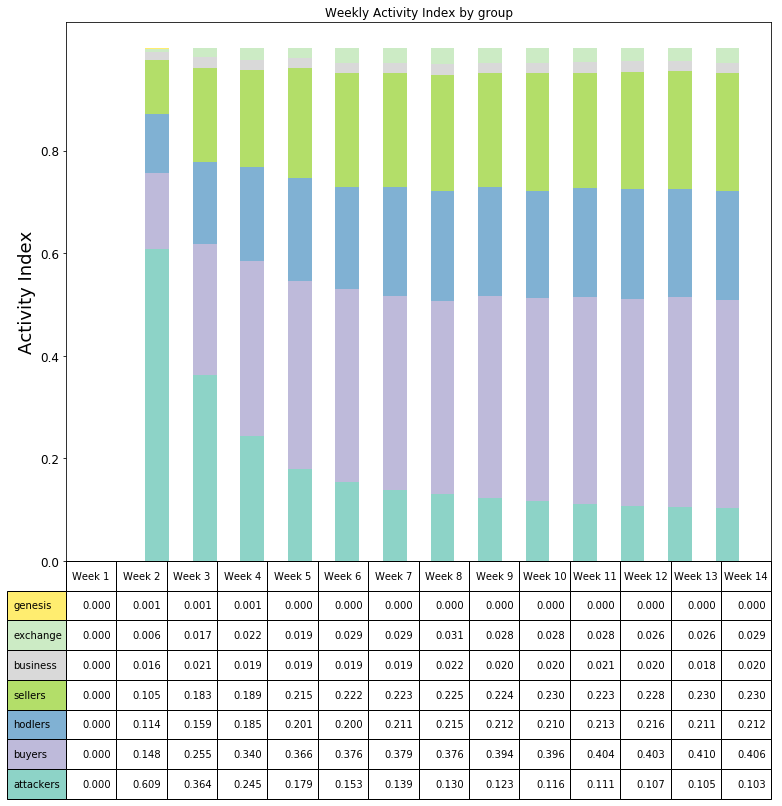

In [144]:
data_activity_index = [genesis_activity_index,
                      exchange_activity_index,
                      business_activity_index,
                      seller_activity_index,
                      hodler_activity_index,
                      buyer_activity_index,
                      attacker_activity_index]

values = np.arange(0, 1, 0.2)
step = 1
colors = plt.cm.Set3(np.linspace(0, 1, len(rows)))
n_rows = len(data_gravity_index)

index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))

for row in range(n_rows):
    plt.bar(index, data_activity_index[::-1][row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_activity_index[::-1][row]

colors = colors[::-1]

y_offset = np.zeros(len(columns))
t_text= []

for row in range(n_rows):
    y_offset = data_activity_index[row]
    t_text.append(['%1.3f' % (x) for x in y_offset])

activity_table = plt.table(cellText=t_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

activity_table.auto_set_font_size(False)
activity_table.set_fontsize(10)


plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel("Activity Index",size=18,weight='light')
plt.yticks(values*step, ['%1.1f' % val for val in values],size=12,weight='light')
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(14,11)
plt.title('Weekly Activity Index by group')
plt.show()

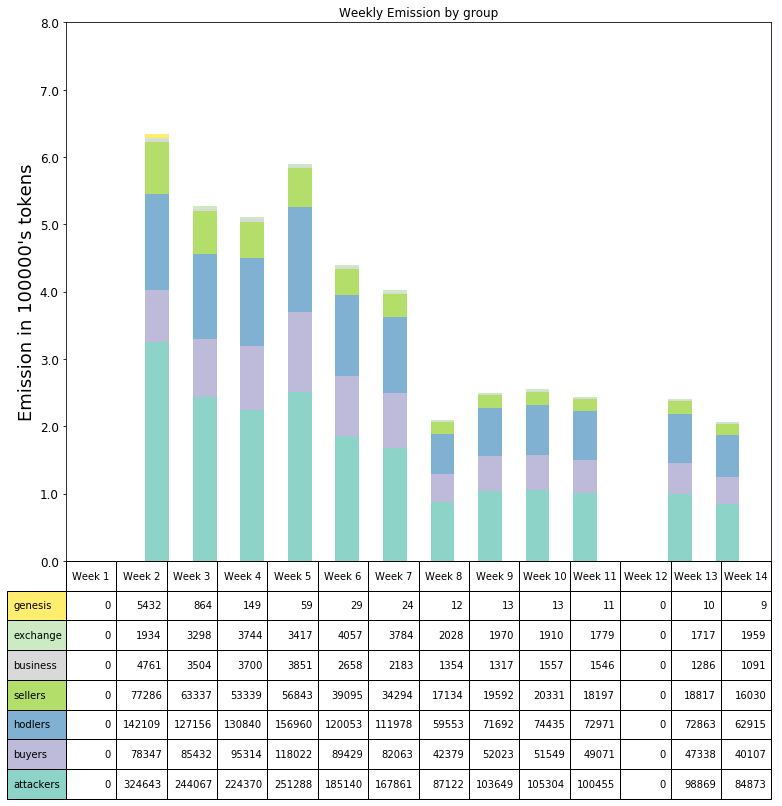

In [145]:
data_emission = [genesis_emission,
                 exchange_emission,
                 business_emission,
                 seller_emission,
                 hodler_emission,
                 buyer_emission, 
                 attacker_emission]

values = np.arange(0, 9, 1)
step = 100000
colors = plt.cm.Set3(np.linspace(0, 1, len(rows)))
n_rows = len(data_emission)

index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))

for row in range(n_rows):
    plt.bar(index, data_emission[::-1][row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_emission[::-1][row]

colors = colors[::-1]

y_offset = np.zeros(len(columns))
t_text= []

for row in range(n_rows):
    y_offset = data_emission[row]
    t_text.append(['%1.0f' % (x) for x in y_offset])

emission_table = plt.table(cellText=t_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

emission_table.auto_set_font_size(False)
emission_table.set_fontsize(10)


plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel("Emission in {0}'s tokens".format(step),size=18,weight='light')
plt.yticks(values*step,['%1.1f' % val for val in values],size=12,weight='light')
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(14,11)
plt.title('Weekly Emission by group')
plt.show()

## Weekly balances by group

In [146]:
#Group days by week
weeks = []
for eday in emission_days[:-1]:
    w = []
    for day in tx_days:
        if day >= eday and day < emission_days[emission_days.index(eday)+1]:
            w.append(day)
    weeks.append(w)

In [147]:
def sender(tx):
    return tx[5]
def receiver(tx):
    return tx[6]
def sender_add(tx):
    return tx[1]
def receiver_add(tx):
    return tx[2]
def tx_date(tx):
    return tx[0][0:10]
def tx_amount(tx):
    return tx[3]

In [148]:
#Group transactions by week
tx_by_week = {}
for week in tqdm(weeks):
    tx_by_week[weeks.index(week)+1] = []
    for tx in transactions:
        if tx_date(tx) in week:
            tx_by_week[weeks.index(week)+1].append(tx)

100%|██████████| 13/13 [00:00<00:00, 13.34it/s]


In [149]:
seller_balance = [0]
hodler_balance = [0]
buyer_balance = [0]
exchange_balance = [0]
genesis_balance = [1000000000]
business_balance = [0]
attacker_balance = [0]
seller_volume = [0]
hodler_volume = [0]
buyer_volume = [0]
exchange_volume = [0]
genesis_volume = [0]
business_volume = [0]
attacker_volume = [0]

seller_txcount_send = []
hodler_txcount_send = []
buyer_txcount_send = []
exchange_txcount_send = []
genesis_txcount_send = []
business_txcount_send = []
attacker_txcount_send = []
seller_txcount_receive = []
hodler_txcount_receive = []
buyer_txcount_receive = []
exchange_txcount_receive = []
genesis_txcount_receive = []
business_txcount_receive = []
attacker_txcount_receive = []

account_open = {}
accounts_old = []

#Prepare weekly data for plotting
fee = 20
for week in weeks:
    account_open[weeks.index(week)+1] = []
    exchange_b = exchange_balance[-1]
    genesis_b = genesis_balance[-1]
    seller_b = seller_balance[-1]
    buyer_b = buyer_balance[-1]
    hodler_b = hodler_balance[-1]
    business_b = business_balance[-1]
    attacker_b = attacker_balance[-1]
    exchange_v = 0
    genesis_v = 0
    seller_v = 0
    buyer_v = 0
    hodler_v = 0
    business_v = 0
    attacker_v = 0
    exchange_cs = 0
    genesis_cs = 0
    seller_cs = 0
    buyer_cs = 0
    hodler_cs = 0
    business_cs = 0
    attacker_cs = 0
    exchange_cr = 0
    genesis_cr = 0
    seller_cr = 0
    buyer_cr = 0
    hodler_cr = 0
    business_cr = 0
    attacker_cr = 0
    
    for tx in tx_by_week[weeks.index(week)+1]:
        if tx_date(tx) in week:
            
            if sender_add(tx) not in accounts_old:
                account_open[weeks.index(week)+1].append(sender_add(tx))
                accounts_old.append(sender_add(tx))
            if receiver_add(tx) not in accounts_old:
                accounts_old.append(receiver_add(tx))
                account_open[weeks.index(week)+1].append(receiver_add(tx))
            
            if sender(tx) == 'genesis':
                genesis_b -= float(tx_amount(tx)) + fee
                genesis_v += float(tx_amount(tx))
                genesis_cs += 1
            if sender(tx) == 'exchange':
                exchange_b -= float(tx_amount(tx)) + fee
                exchange_v += float(tx_amount(tx))
                exchange_cs += 1
            if sender(tx) == 'seller':
                seller_b -= float(tx_amount(tx)) + fee
                seller_v += float(tx_amount(tx))
                seller_cs += 1
            if sender(tx) == 'buyer':
                buyer_b -= float(tx_amount(tx)) + fee
                buyer_v += float(tx_amount(tx))
                buyer_cs += 1
            if sender(tx) == 'hodler':
                hodler_b -= float(tx_amount(tx)) + fee
                hodler_v += float(tx_amount(tx))
                hodler_cs += 1
            if sender(tx) == 'business':
                business_b -= float(tx_amount(tx)) + fee
                business_v += float(tx_amount(tx))
                business_cs += 1
            if sender(tx) == 'attacker':
                attacker_b -= float(tx_amount(tx)) + fee
                attacker_v += float(tx_amount(tx))
                attacker_cs += 1
            
            if receiver(tx) == 'genesis':
                genesis_b += float(tx_amount(tx))
                genesis_cr +=1
            if receiver(tx) == 'exchange':
                exchange_b += float(tx_amount(tx))
                exchange_cr +=1
            if receiver(tx) == 'seller':
                seller_b += float(tx_amount(tx))
                seller_cr +=1
            if receiver(tx) == 'buyer':
                buyer_b += float(tx_amount(tx))
                buyer_cr +=1
            if receiver(tx) == 'hodler':
                hodler_b += float(tx_amount(tx))
                hodler_cr +=1
            if receiver(tx) == 'business':
                business_b += float(tx_amount(tx))
                business_cr +=1
            if receiver(tx) == 'attacker':
                attacker_b += float(tx_amount(tx))
                attacker_cr +=1
                
    seller_balance.append(seller_b)
    hodler_balance.append(hodler_b)
    buyer_balance.append(buyer_b)
    exchange_balance.append(exchange_b)
    genesis_balance.append(genesis_b)
    business_balance.append(business_b)
    attacker_balance.append(attacker_b)
    seller_volume.append(seller_v)
    hodler_volume.append(hodler_v)
    buyer_volume.append(buyer_v)
    exchange_volume.append(exchange_v)
    genesis_volume.append(genesis_v)
    business_volume.append(business_v)
    attacker_volume.append(attacker_v)
    seller_txcount_send.append(seller_cs)
    hodler_txcount_send.append(hodler_cs)
    buyer_txcount_send.append(buyer_cs)
    exchange_txcount_send.append(exchange_cs)
    genesis_txcount_send.append(genesis_cs)
    business_txcount_send.append(business_cs)
    attacker_txcount_send.append(attacker_cs)
    seller_txcount_receive.append(seller_cr)
    hodler_txcount_receive.append(hodler_cr)
    buyer_txcount_receive.append(buyer_cr)
    exchange_txcount_receive.append(exchange_cr)
    genesis_txcount_receive.append(genesis_cr)
    business_txcount_receive.append(business_cr)
    attacker_txcount_receive.append(attacker_cr)
    
business_account_counter = [0]
buyer_account_counter = [0]
seller_account_counter = [0]
hodler_account_counter = [0]
attacker_account_counter = [0]
for week in account_open.keys():
    b_acc = [user_types[_] for _ in account_open[week]]
    business_account_counter.append(b_acc.count('business')+business_account_counter[-1])
    buyer_account_counter.append(b_acc.count('buyer')+buyer_account_counter[-1])
    seller_account_counter.append(b_acc.count('seller')+seller_account_counter[-1])
    hodler_account_counter.append(b_acc.count('hodler')+hodler_account_counter[-1])
    attacker_account_counter.append(b_acc.count('attacker')+attacker_account_counter[-1])

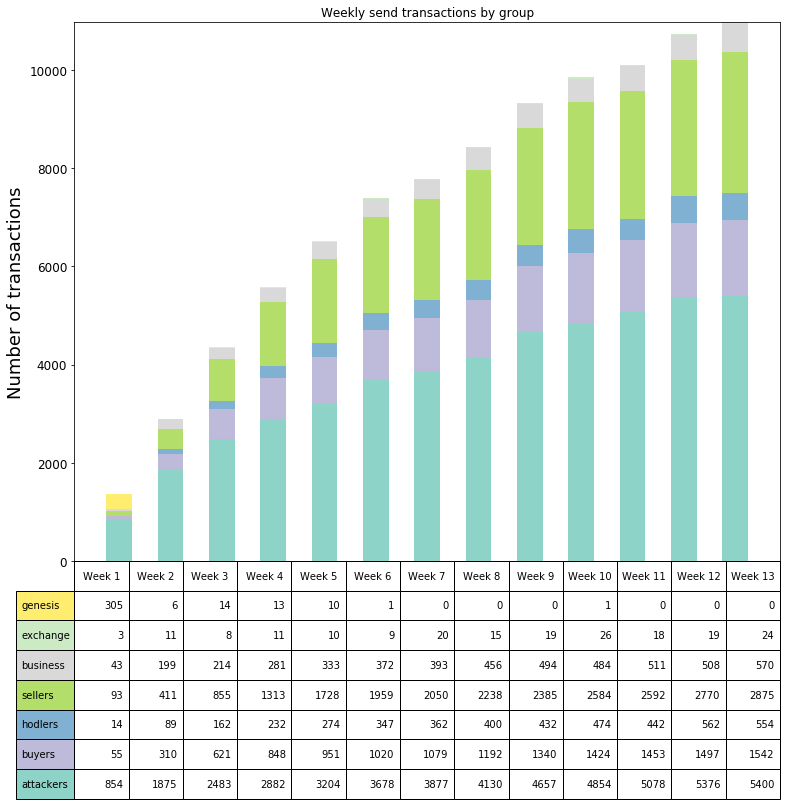

In [150]:
data_senders = [genesis_txcount_send,
                exchange_txcount_send,
                business_txcount_send,
                seller_txcount_send,
                hodler_txcount_send,
                buyer_txcount_send,
                attacker_txcount_send]

columns = ('Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7',\
           'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 'Week 13')

rows = ['genesis', 'exchange', 'business', 'sellers', 'hodlers', 'buyers', 'attackers']
#rows = rows[::-1]

values = np.arange(0, 12000, 2000)
step = 1

colors = plt.cm.Set3(np.linspace(0, 1, len(rows)))
n_rows = len(data_senders)

index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))

for row in range(n_rows):
    plt.bar(index, data_senders[::-1][row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_senders[::-1][row]

colors = colors[::-1]

y_offset = np.zeros(len(columns))
t_text= []

for row in range(n_rows):
    y_offset = data_senders[row]
    t_text.append(['%d' % (x) for x in y_offset])

sender_table = plt.table(cellText=t_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

sender_table.auto_set_font_size(False)
sender_table.set_fontsize(10)


plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel("Number of transactions",size=18,weight='light')
plt.yticks(values * step, ['%d' % val for val in values],size=12,weight='light')
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(14,11)
plt.title('Weekly send transactions by group')
plt.show()

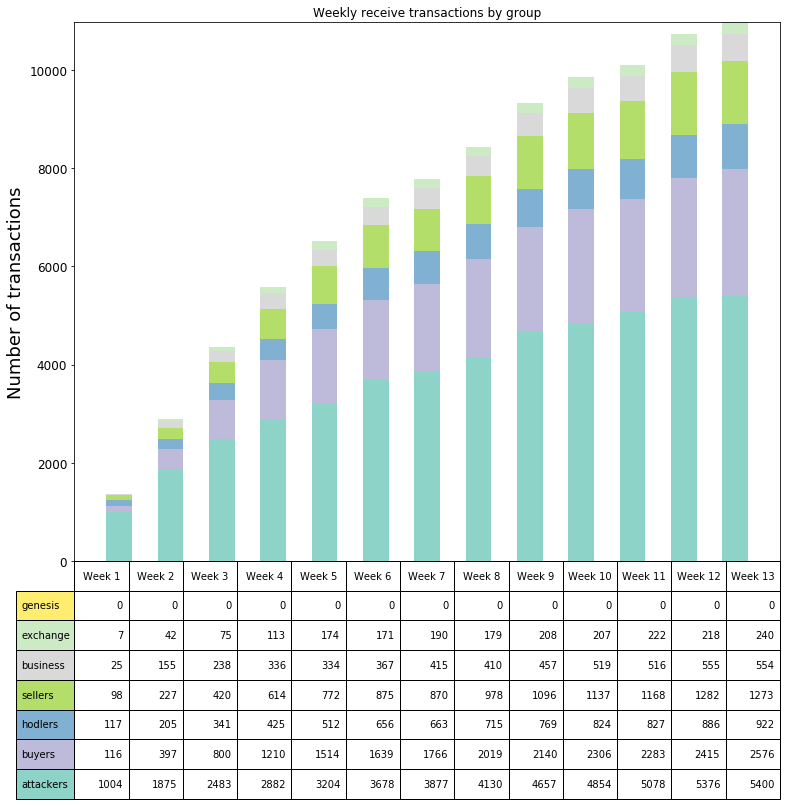

In [151]:
data_receivers = [genesis_txcount_receive,
                  exchange_txcount_receive,
                  business_txcount_receive,
                  seller_txcount_receive,
                  hodler_txcount_receive,
                  buyer_txcount_receive,
                  attacker_txcount_receive]

columns = ('Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7',\
           'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 'Week 13')

rows = ['genesis', 'exchange', 'business', 'sellers', 'hodlers', 'buyers', 'attackers']
#rows = rows[::-1]

values = np.arange(0, 12000, 2000)
step = 1

colors = plt.cm.Set3(np.linspace(0, 1, len(rows)))
n_rows = len(data_receivers)

index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))

for row in range(n_rows):
    plt.bar(index, data_receivers[::-1][row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_receivers[::-1][row]

colors = colors[::-1]

y_offset = np.zeros(len(columns))
t_text= []

for row in range(n_rows):
    y_offset = data_receivers[row]
    t_text.append(['%d' % (x) for x in y_offset])

receivers_table = plt.table(cellText=t_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

receivers_table.auto_set_font_size(False)
receivers_table.set_fontsize(10)


plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel("Number of transactions",size=18,weight='light')
plt.yticks(values * step, ['%d' % val for val in values],size=12,weight='light')
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(14,11)
plt.title('Weekly receive transactions by group')
plt.show()

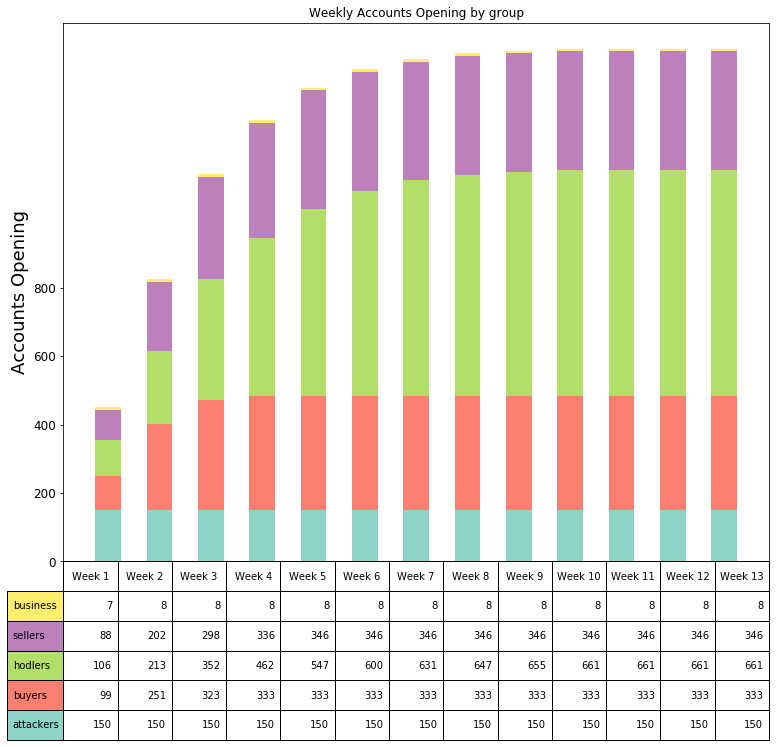

In [152]:
data_accounts = [business_account_counter[1:],
                 seller_account_counter[1:],
                 hodler_account_counter[1:],
                 buyer_account_counter[1:], 
                 attacker_account_counter[1:]]

columns = ('Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7',\
           'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 'Week 13')

rows = ['business', 'sellers', 'hodlers', 'buyers', 'attackers']
#rows = rows[::-1]

values = np.arange(0, 1000, 200)
step = 1
colors = plt.cm.Set3(np.linspace(0, 1, len(rows)))
n_rows = len(data_accounts)

index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))


for row in range(n_rows):
    plt.bar(index, data_accounts[::-1][row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_accounts[::-1][row]

colors = colors[::-1]

y_offset = np.zeros(len(columns))
t_text= []

for row in range(n_rows):
    y_offset = data_accounts[row]
    t_text.append(['%d' % (x) for x in y_offset])

accounts_table = plt.table(cellText=t_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

accounts_table.auto_set_font_size(False)
accounts_table.set_fontsize(10)


plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel("Accounts Opening",size=18,weight='light')
plt.yticks(values*step, ['%d' % val for val in values],size=12,weight='light')
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(14,11)
plt.title('Weekly Accounts Opening by group')
plt.show()

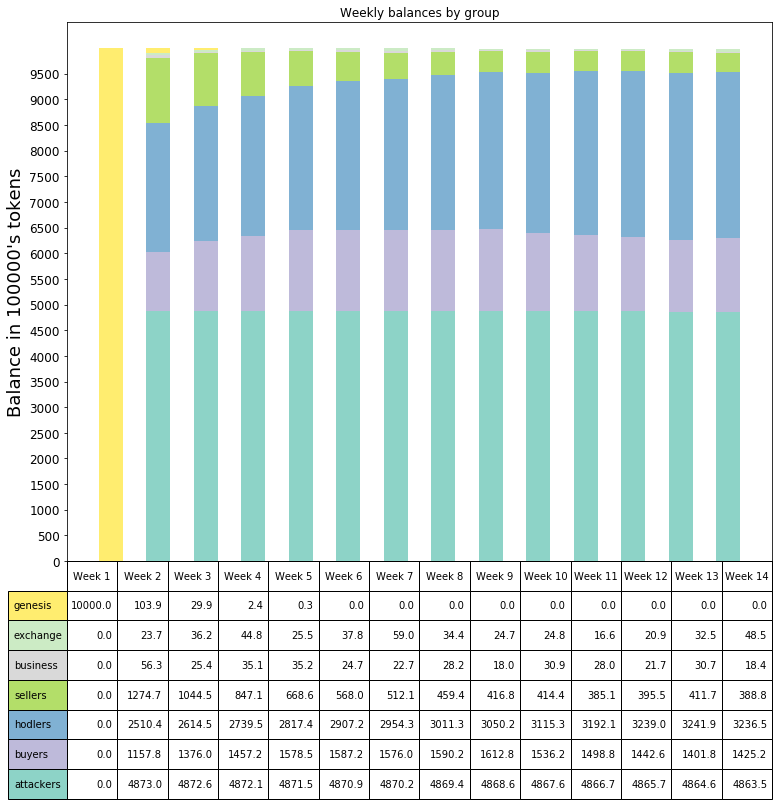

In [153]:
data = [genesis_balance,
        exchange_balance,
        business_balance,
        seller_balance,
        hodler_balance,
        buyer_balance,
        attacker_balance]

columns = ('Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7',\
           'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 'Week 13', 'Week 14')

rows = ['genesis', 'exchange', 'business', 'sellers', 'hodlers', 'buyers', 'attackers']
#rows = rows[::-1]

values = np.arange(0, 10000, 500)
step = 100000

colors = plt.cm.Set3(np.linspace(0, 1, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))

for row in range(n_rows):
    plt.bar(index, data[::-1][row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[::-1][row]

colors = colors[::-1]

y_offset = np.zeros(len(columns))
t_text= []

for row in range(n_rows):
    y_offset = data[row]
    t_text.append(['%1.1f' % (x / 100000.0) for x in y_offset])

balance_table = plt.table(cellText=t_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

balance_table.auto_set_font_size(False)
balance_table.set_fontsize(10)


plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel("Balance in {0}'s tokens".format(step),size=18,weight='light')
plt.yticks(values * step, ['%d' % val for val in values],size=12,weight='light')
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(14,11)
plt.title('Weekly balances by group')
plt.show()

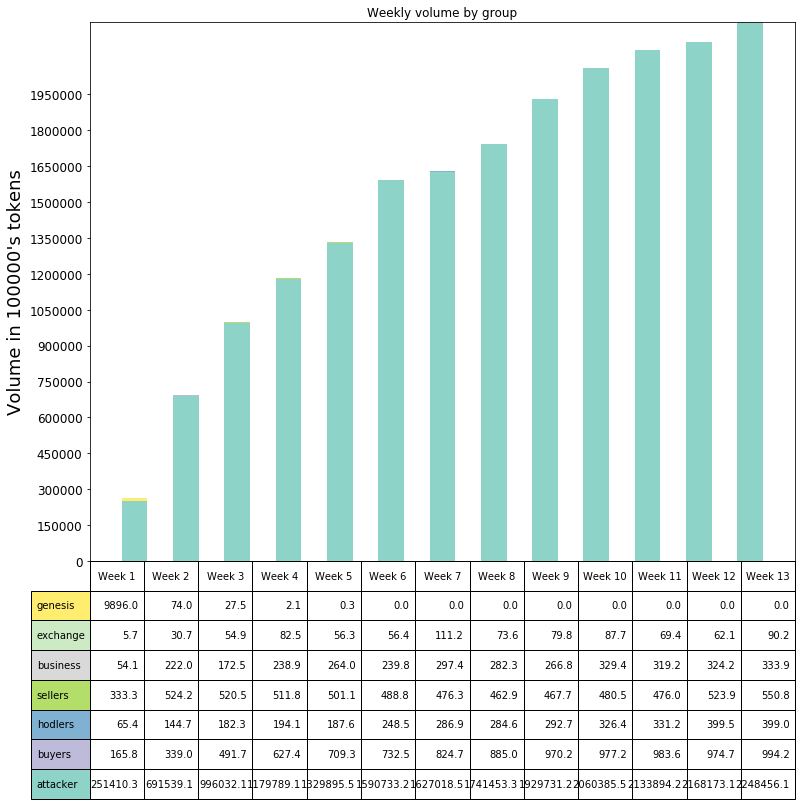

In [154]:
data_volume = [genesis_volume[1:],
               exchange_volume[1:],
               business_volume[1:],
               seller_volume[1:],
               hodler_volume[1:],
               buyer_volume[1:],
               attacker_volume[1:]]
             

columns = ('Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7',\
           'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 'Week 13')

rows = ['genesis', 'exchange', 'business', 'sellers', 'hodlers', 'buyers', 'attacker']
#rows = rows[::-1]

values = np.arange(0, 2000000, 150000)
step = 100000

colors = plt.cm.Set3(np.linspace(0, 1, len(rows)))
n_rows = len(data_volume)

index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))

for row in range(n_rows):
    plt.bar(index, data_volume[::-1][row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_volume[::-1][row]

colors = colors[::-1]

y_offset = np.zeros(len(columns))
t_text= []

for row in range(n_rows):
    y_offset = data_volume[row]
    t_text.append(['%1.1f' % (x / 100000.0) for x in y_offset])

volume_table = plt.table(cellText=t_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

volume_table.auto_set_font_size(False)
volume_table.set_fontsize(10)


plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel("Volume in {0}'s tokens".format(step),size=18,weight='light')
plt.yticks(values * step, ['%d' % val for val in values],size=12,weight='light')
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(14,11)
plt.title('Weekly volume by group')
plt.show()

## Fees and transaction count

In [155]:
total_fees_paid = 0
for j in emission_data['2018-07-01']:
    total_fees_paid += j[7]
    
print('Total fees:', total_fees_paid, 'Transaction count:', total_fees_paid/20)

Total fees: 1920860.0 Transaction count: 96043.0


## Account activity weekly 

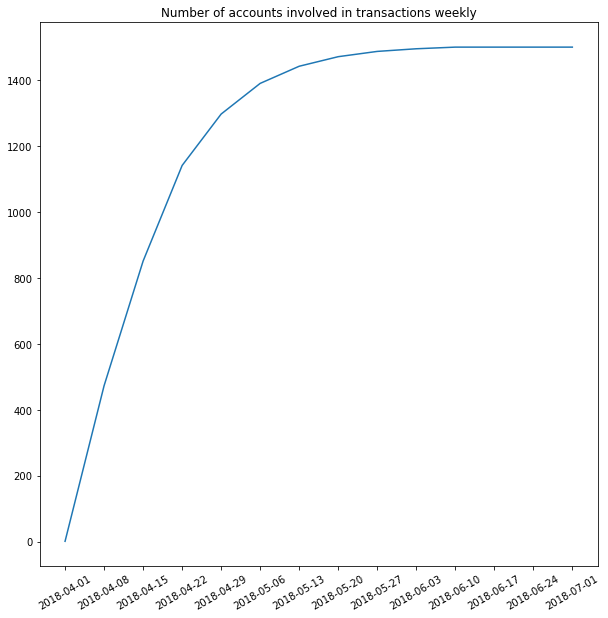

In [156]:
active_nodes_weekly = [len(emission_data[day]) for day in emission_days]
plt.plot(active_nodes_weekly)
plt.title('Number of accounts involved in transactions weekly')
plt.xticks(range(len(emission_days)), emission_days, rotation=30)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

## 20% of tokens held by the richest wallets (meaning accounts)

In [157]:
top_twenty_percent = 0
attack_wallets = 0
j = 0
while top_twenty_percent < 0.2*1000000000:
    top_twenty_percent += sorted(emission_data['2018-07-01'], key = lambda x: x[1])[::-1][j][1]
    wallet = sorted(emission_data['2018-07-01'], key = lambda x: x[1])[::-1][j][0]
    if wallet in attackers:
        print(wallet)
        attack_wallets += sorted(emission_data['2018-07-01'], key = lambda x: x[1])[::-1][j][1]
        print(sorted(emission_data['2018-07-01'], key = lambda x: x[1])[::-1][j][1])
    j +=1
print(j,'wallets', top_twenty_percent, 'volume of tokens')
print(attack_wallets, 'richest attackers own', (attack_wallets/1000000000)*100, 'percent')

g2643r2681j4147
242522000.0
1 wallets 242522000.0 volume of tokens
242522000.0 richest attackers own 24.2522 percent


In [158]:
business_dynamics = {}
for day in emission_days:
    business_dynamics[day] = []
    for b in businesses:
        bdays = [d[0] for d in emission_data[day]]
        if b in bdays:
            business_dynamics[day].append(emission_data[day][bdays.index(b)])

In [159]:
attacker_dynamics = {}
for day in emission_days:
    attacker_dynamics[day] = []
    for a in attackers:
        adays = [d[0] for d in emission_data[day]]
        if a in adays:
            attacker_dynamics[day].append(emission_data[day][adays.index(a)])

## Emission received by businesses

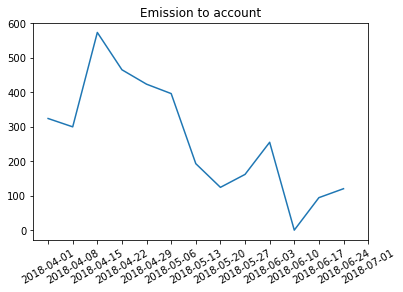

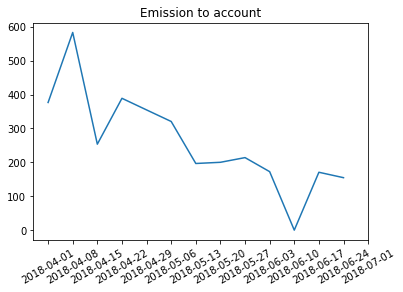

In [160]:
business_plots = {}
for b in businesses[0:2]:
    business_plots[b] = []
    for day in emission_days[1:]:
        business_plots[b].append(business_dynamics[day][businesses.index(b)])
for b in businesses[0:2]:
    plt.plot([i[5] for i in business_plots[b]])
    plt.xticks(range(len(emission_days)), emission_days, rotation=30)
    plt.title('Emission to account')
    plt.show()

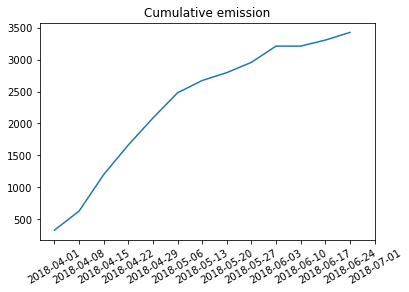

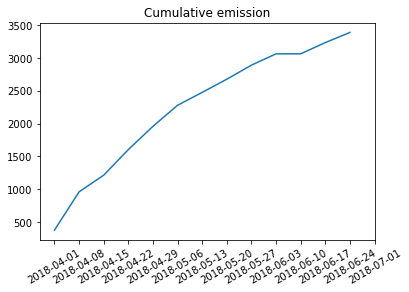

In [161]:
for b in businesses[0:2]:
    plt.plot([i[6] for i in business_plots[b]])
    plt.xticks(range(len(emission_days)), emission_days, rotation=30)
    plt.title('Cumulative emission')
    plt.show()

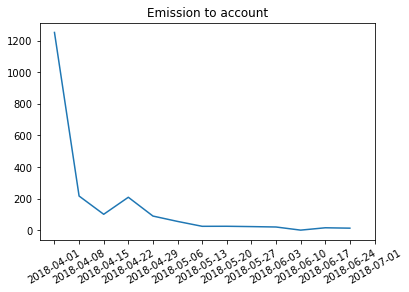

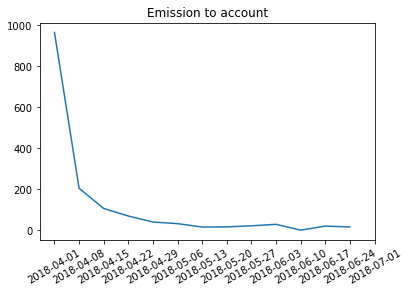

In [162]:
attacker_plots = {}
for a in attackers:
    attacker_plots[a] = []
    for day in emission_days[1:]:
        attacker_plots[a].append(attacker_dynamics[day][attackers.index(a)])
for a in attackers[0:2]:
    plt.plot([i[5] for i in attacker_plots[a]])
    plt.xticks(range(len(emission_days)), emission_days, rotation=30)
    plt.title('Emission to account')
    plt.show()

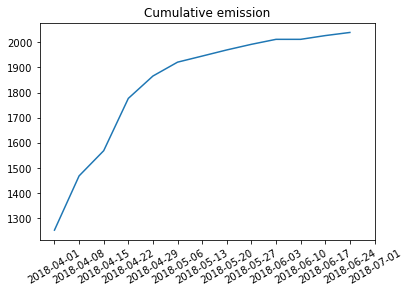

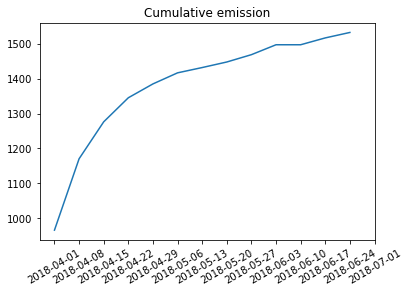

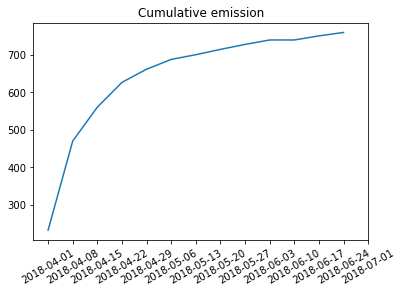

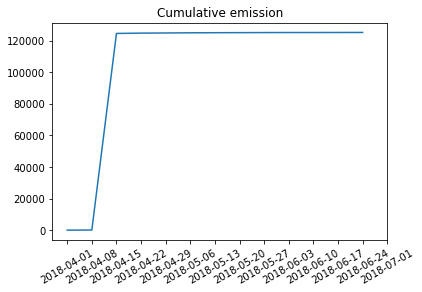

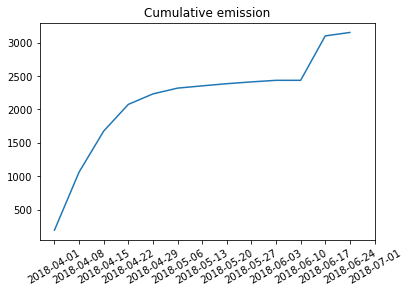

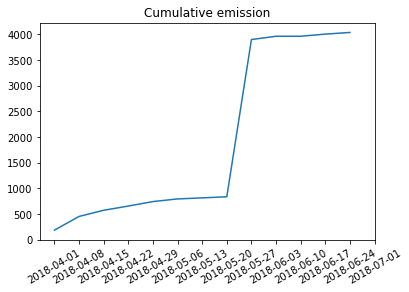

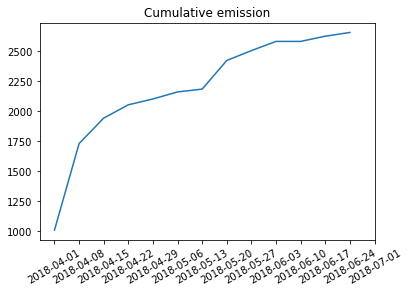

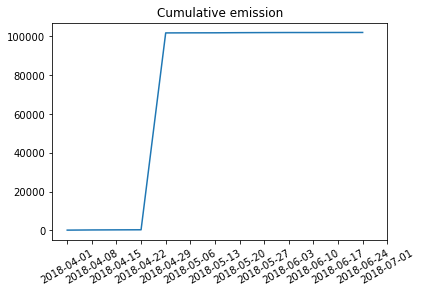

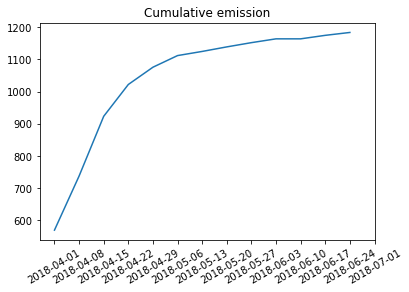

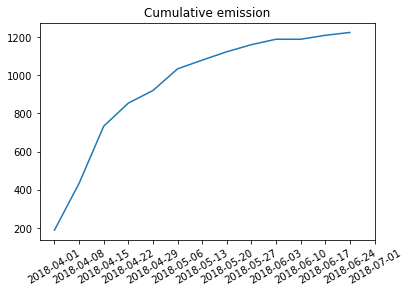

In [163]:
for a in attackers[0:10]:
    plt.plot([i[6] for i in attacker_plots[a]])
    plt.xticks(range(len(emission_days)), emission_days, rotation=30)
    plt.title('Cumulative emission')
    plt.show()